In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

From dataset found here:

https://www.kaggle.com/benroshan/factors-affecting-campus-placement

In [2]:
df = pd.read_csv('Placement_Data_Full_Class.csv')
df.shape

(215, 15)

# Data Visualization of MBA graduates dataset from Bangalore, India. 

This dataset describes the placement of MBA graduates in Bangalore, Inida, Salary figures are in Rupees/Per year converted to USD for ease of comparison. At the time of this notebook, the Rupee/USD converstion is 0.013460
Percentiles represent the candidates percentile of the entire cousreswork in that respective column(ex. MBA_P, 58.80 percentile of class/course)

In [3]:
df.head(3)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0


In [4]:
#convert salary to usd
df.salary = df.salary*0.013460
df.head(2)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,3634.2
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,2692.0


# Data Exploration

Here we have a basic pairplot of the relationship of our numeric features, to get us ideas to explore.

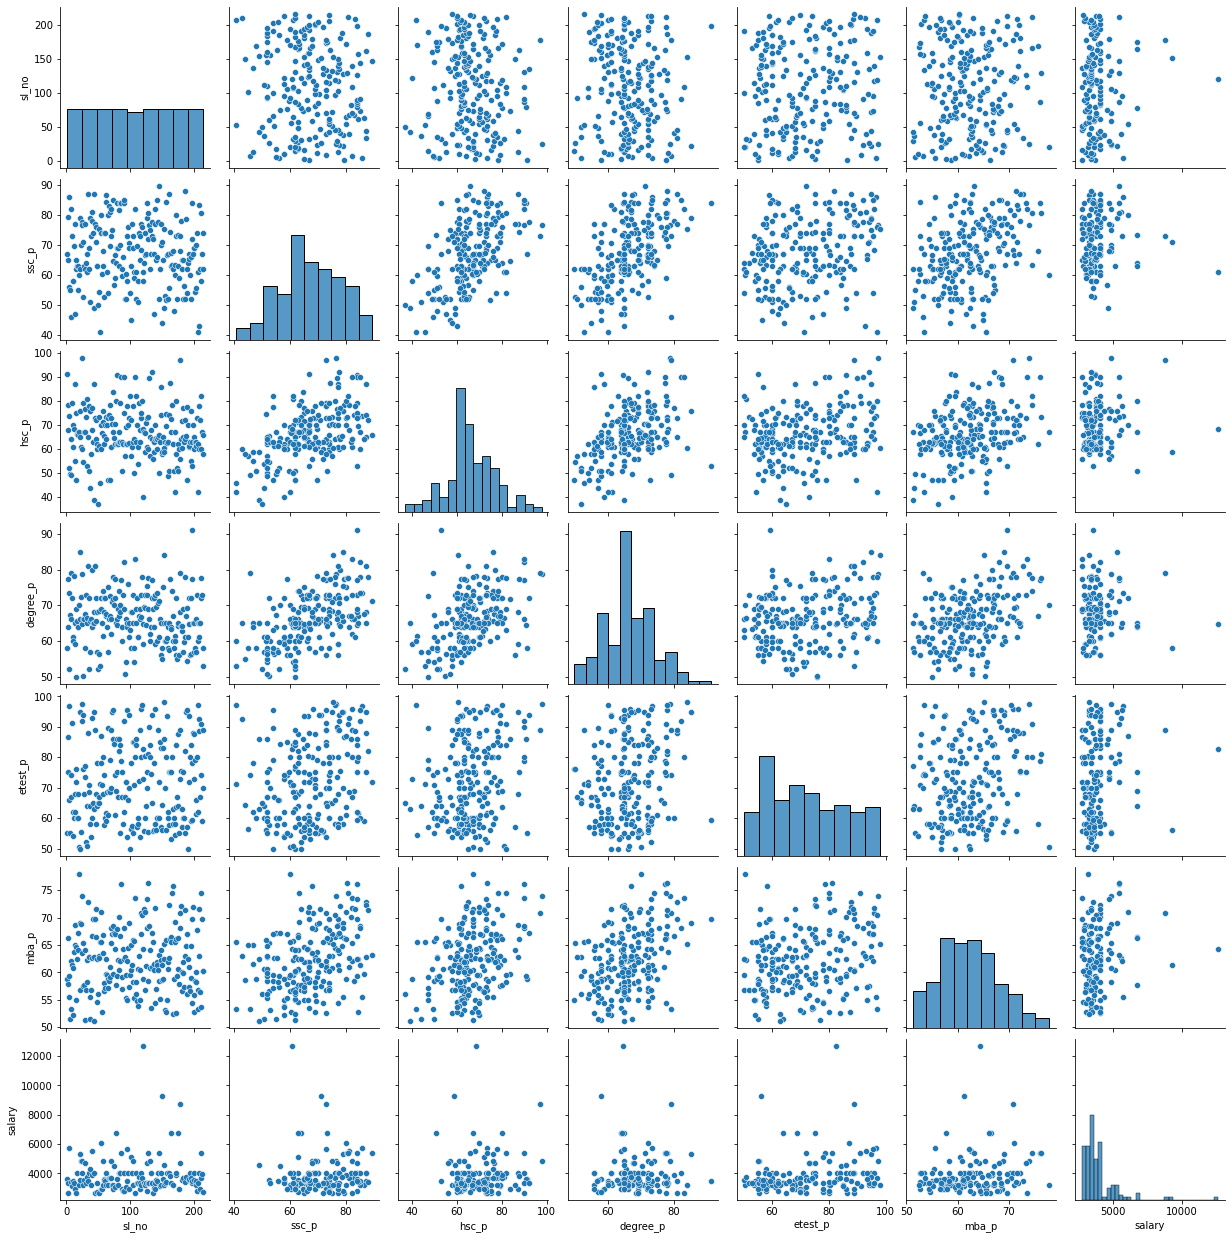

In [5]:
#looking at relationships
df_numeric = df.select_dtypes(include='number')
sns.pairplot(df_numeric)

In [6]:
#convertind colums to list
cols = df.columns.to_list()

In [7]:
#getting column descriptors from Kaggle, unfortunately some are missing, but most can be inferred from context
coldesc = ['Serial Number',#sl_no
           'Gender',#gender
            'Secondary Education percentage',#ssc_p
            'Board of Education- Central/ Others',#ssc_b
            'Higher Secondary Education percentage- 12th Grade',#hsc_p
            'Board of Education- Central/ Others',#hsc_b
            'Specialization in Higher Secondary Education',#hsc_s
            'Degree Percentage',#degree_p
            'Under Graduation(Degree type)- Field of degree education',#degree_t
            'Work Experience',#workex
            'a test percentile score - unknown',#a test percentile score
            'specialisation',#specialisation
            'mba_percentile score',#mba_p course percentage score
            'placed or not placed',#status - placed or unplaced
            'salary',#salary
]

In [8]:
#column descriptors dictionary
descriptions_dictionary = dict(zip(cols, coldesc))
descriptions_dictionary

{'sl_no': 'Serial Number',
 'gender': 'Gender',
 'ssc_p': 'Secondary Education percentage',
 'ssc_b': 'Board of Education- Central/ Others',
 'hsc_p': 'Higher Secondary Education percentage- 12th Grade',
 'hsc_b': 'Board of Education- Central/ Others',
 'hsc_s': 'Specialization in Higher Secondary Education',
 'degree_p': 'Degree Percentage',
 'degree_t': 'Under Graduation(Degree type)- Field of degree education',
 'workex': 'Work Experience',
 'etest_p': 'a test percentile score - unknown',
 'specialisation': 'specialisation',
 'mba_p': 'mba_percentile score',
 'status': 'placed or not placed',
 'salary': 'salary'}

# Applicants to MBA school shoudl not be discouraged because of Educational background

This presentation of data is intended to be non-techincal, persuasive to a student looking to enter an MBA program(in Bangalore, India) about their chances of being placed and salaries after the "course" (akin to a degree in the US). 

While there are differences in placement and salary between scores and previous educational background they are not overwhelming and do not preclude someone from being successful. 

It shows that while grades and educational background can be important. It is very possible to succeed with being placed if grades are not the best or education is not the favored one. 

In [9]:
objcols = df.select_dtypes('object').columns.to_list()
numcols = df_numeric.columns[1:6].to_list()

# Categorical Classes on Placement

Here we can see the various categorical features effect on placement, gender, location, previous education, work experience etc.

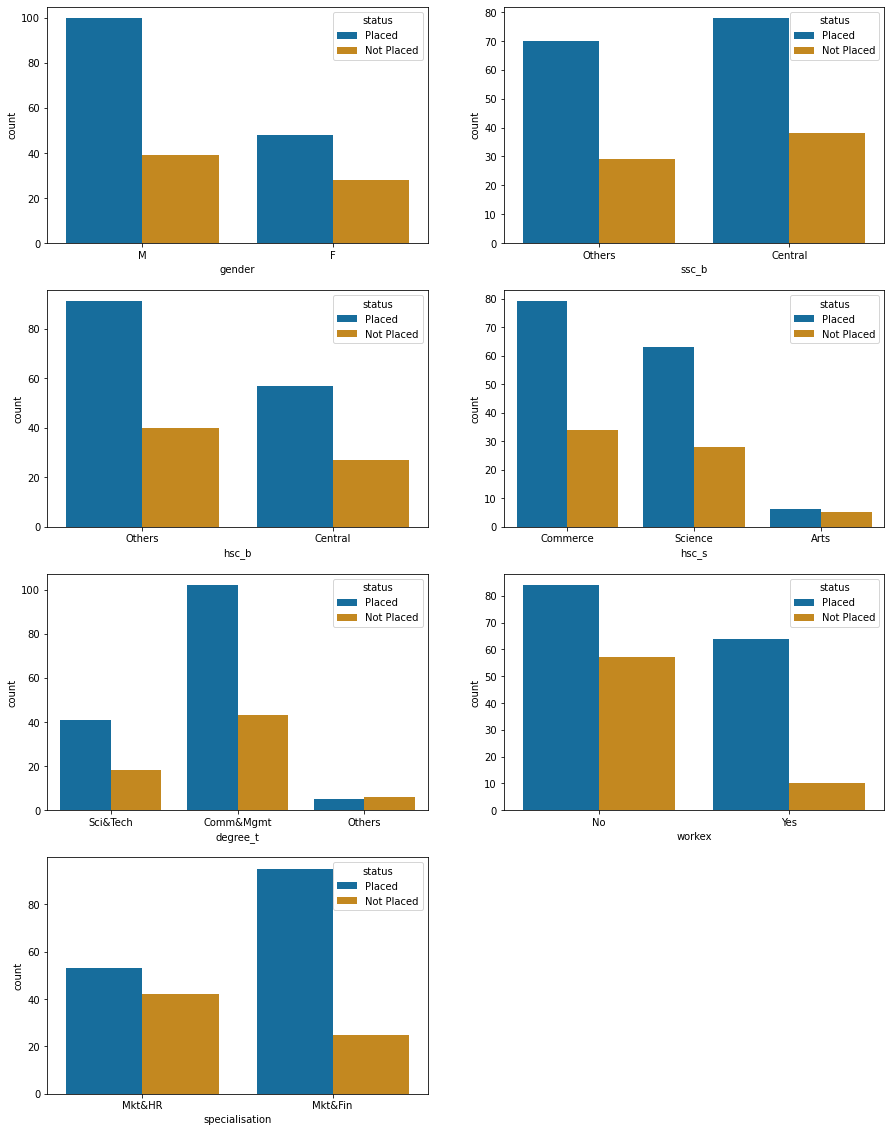

In [10]:
fig = plt.figure(figsize =(15,20))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
for i in objcols[0:7]:
    ax = fig.add_subplot(4, 2, objcols.index(i)+1)
    sns.countplot(x = i, data=df, hue ='status', ax=ax, palette='colorblind')

Visually, there are a couple areas stand out, those with Comm@Mgmt in the "degree_t" categories, and Mkt&Fin and the Specilization category seem to be placed at much higger rates thant there repsective competitor classes. 

Also is seems as though it is very rare for those with work experience to not be placed, as opposed to those who have no work experience.

# Perecentile scores on Placement

Below we have plots showing percentile scores(akin to class position)at each level of education vs. the candidate is placed or not. We can see there are clearly differences in the central tendency of the percentile scores at each level on being placed, however its seems to be not as pronouced in some groups as others.

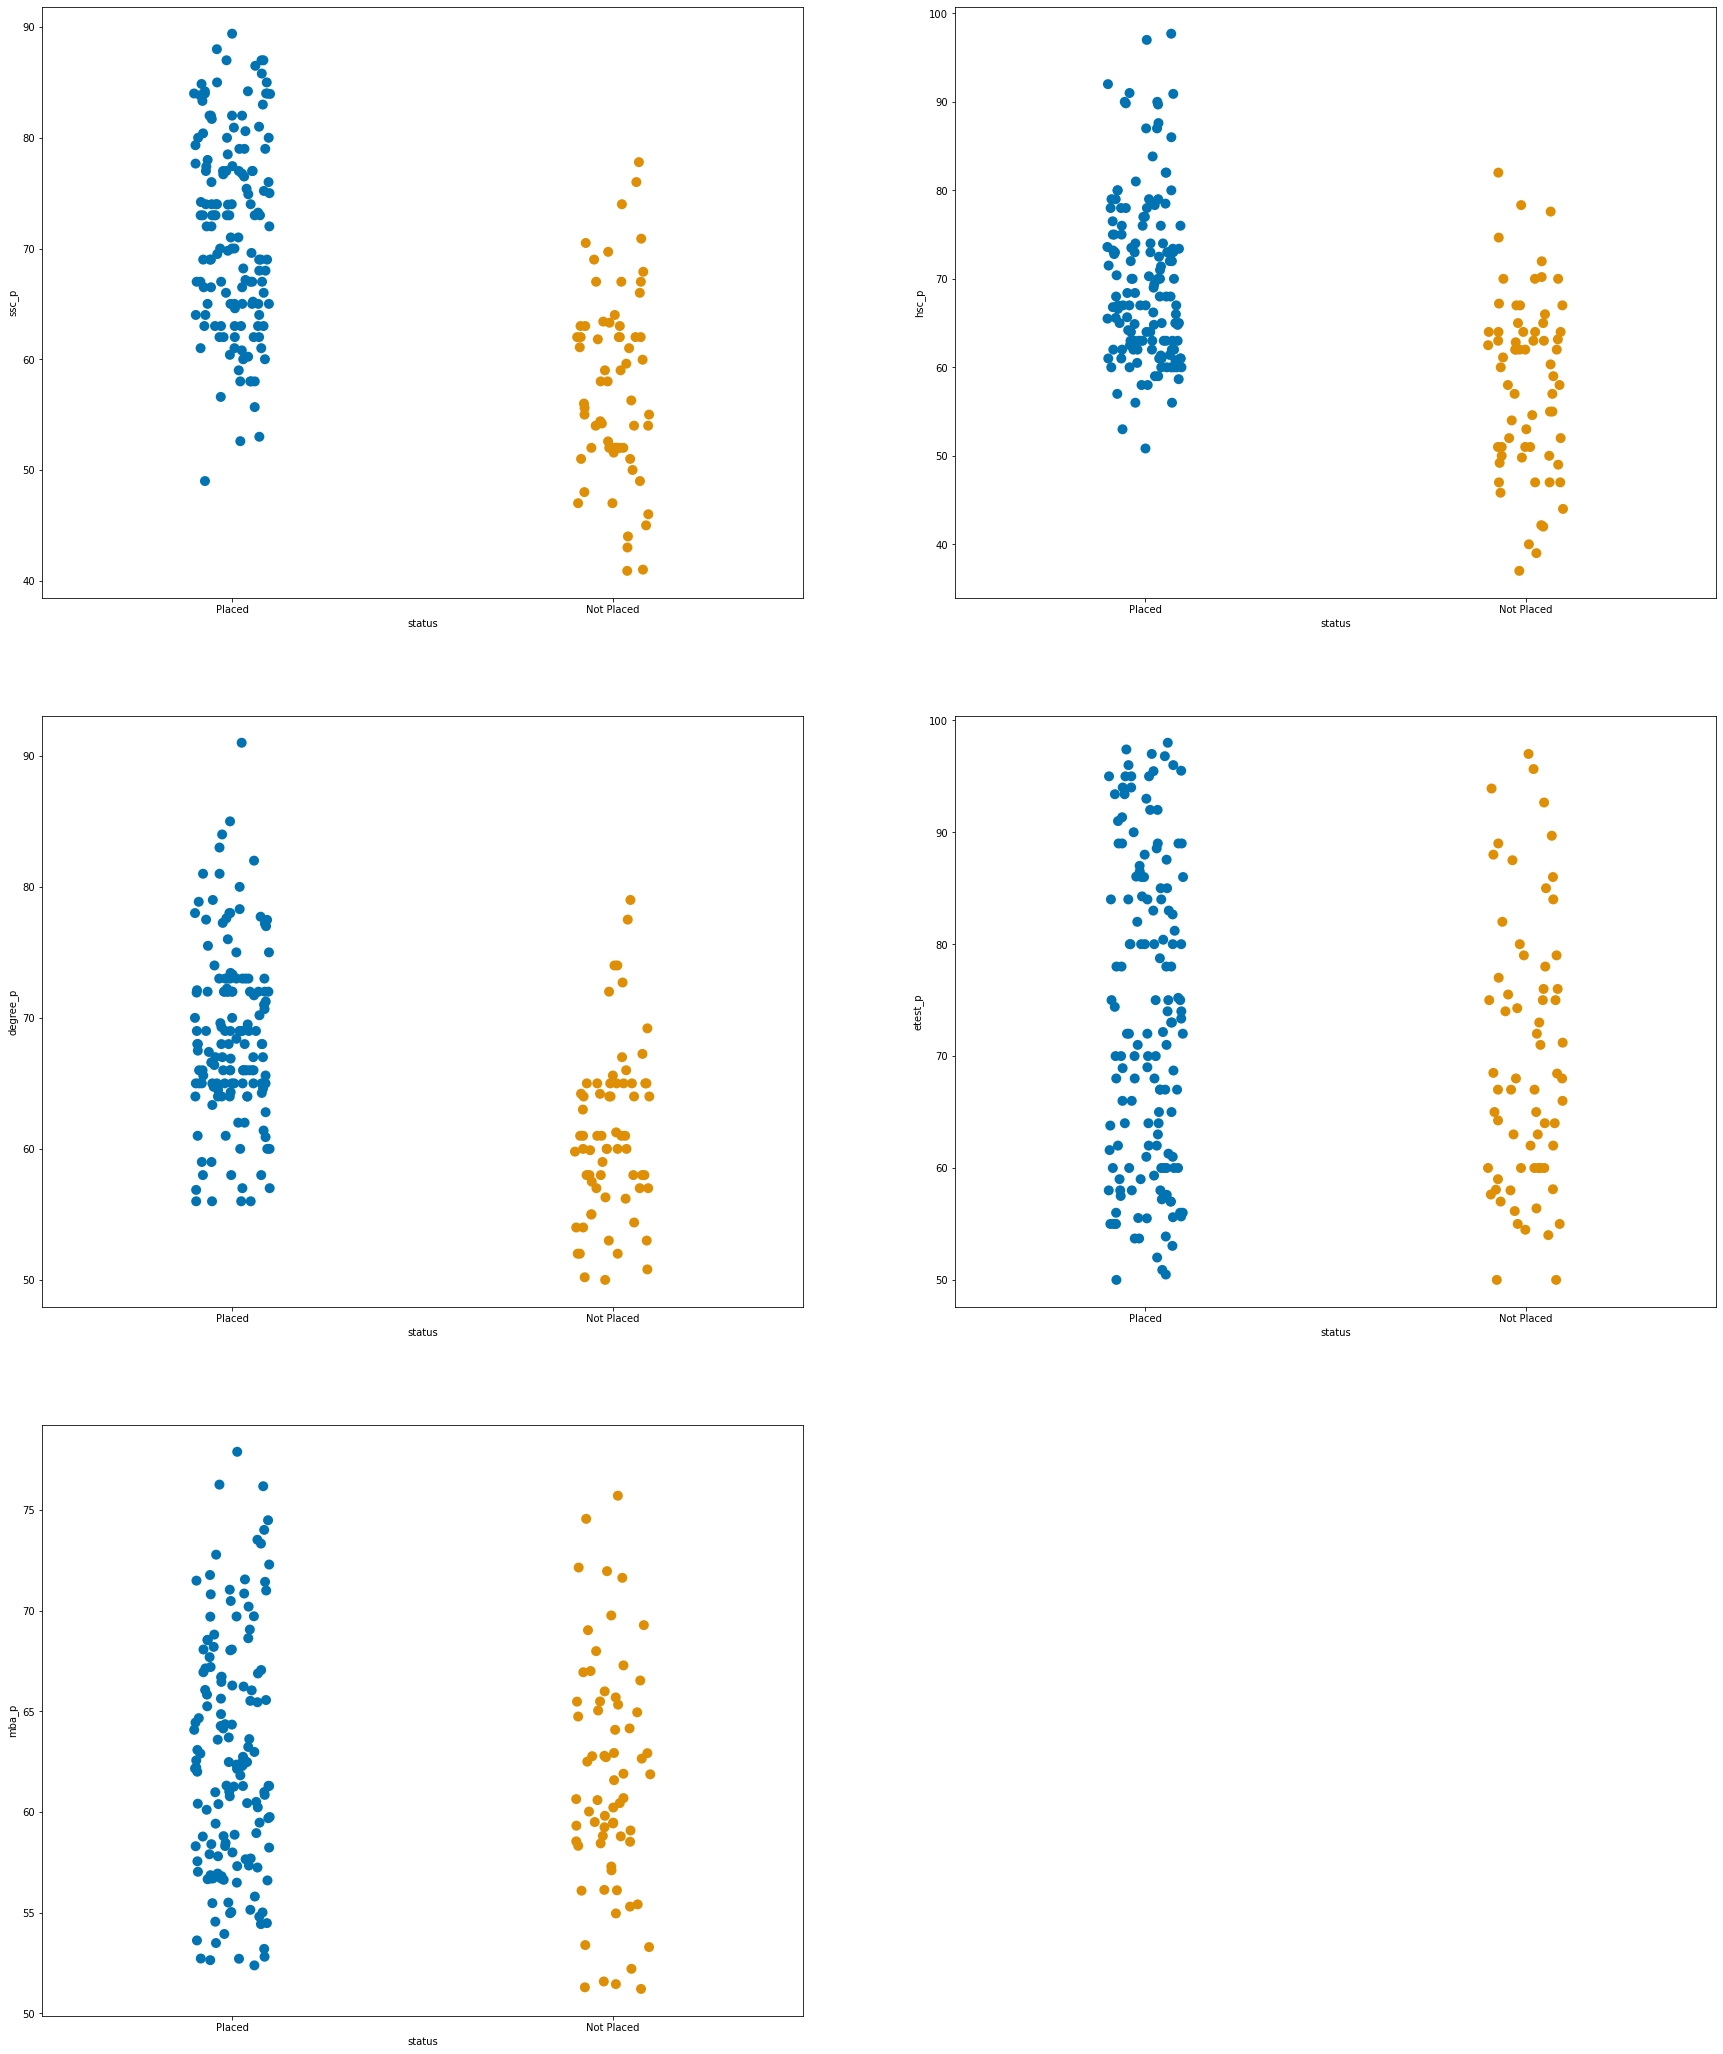

In [11]:
fig = plt.figure(figsize =(30,50))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
for i in numcols:
    ax = fig.add_subplot(4, 2, numcols.index(i)+1)
    sns.stripplot(x = 'status', y =i, data=df, ax=ax, palette='colorblind', size =10)

# Categorical Classes on Salary(if placed)

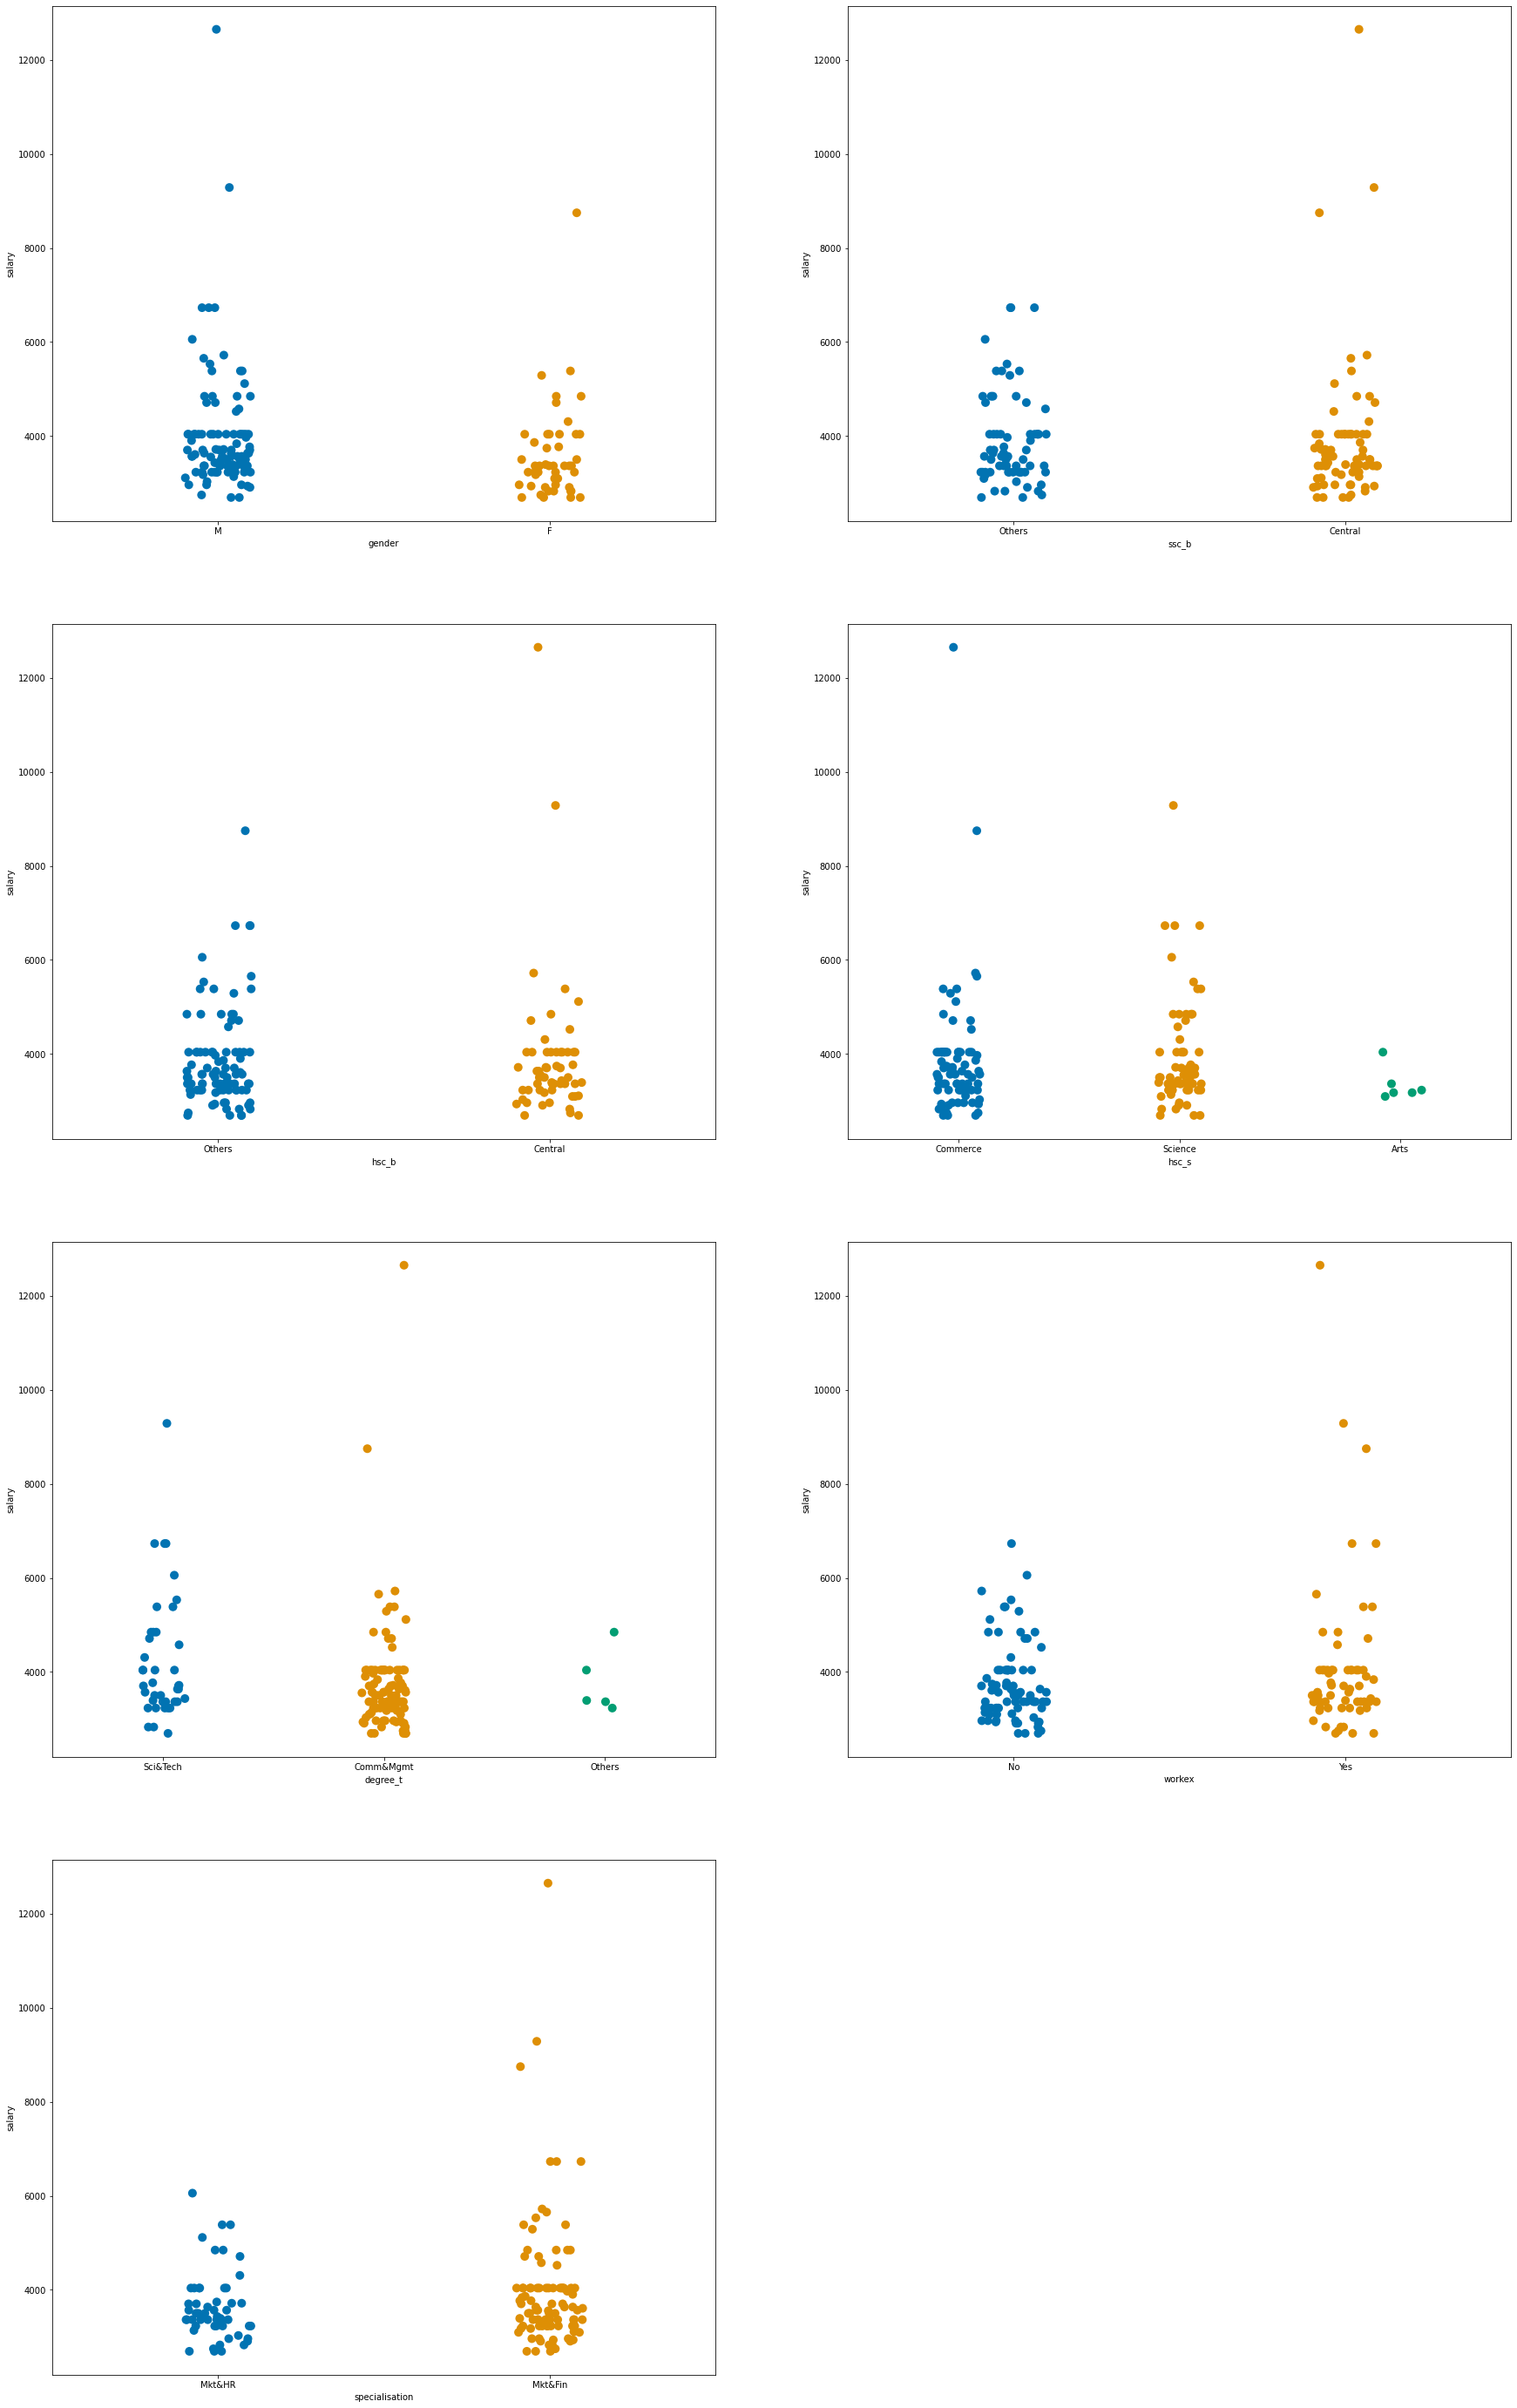

In [12]:
fig = plt.figure(figsize =(30,50))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
for i in objcols[0:7]:
    ax = fig.add_subplot(4, 2, objcols.index(i)+1)
    sns.stripplot(x =i, y ='salary', data=df, ax=ax, palette='colorblind', size =10)

# Percentile scores on Salary(Color indicating undergraduate Degree)

Here we are plotting the percentile scores of each student's posistion in a "course"( which in this dataset each columns is akin to primary, secondary, higher levels education, and their salaries after placement. While position in the course(top of class/bottom of class etc) seems to have a minor relationship on salary, these features do not have large effects. 

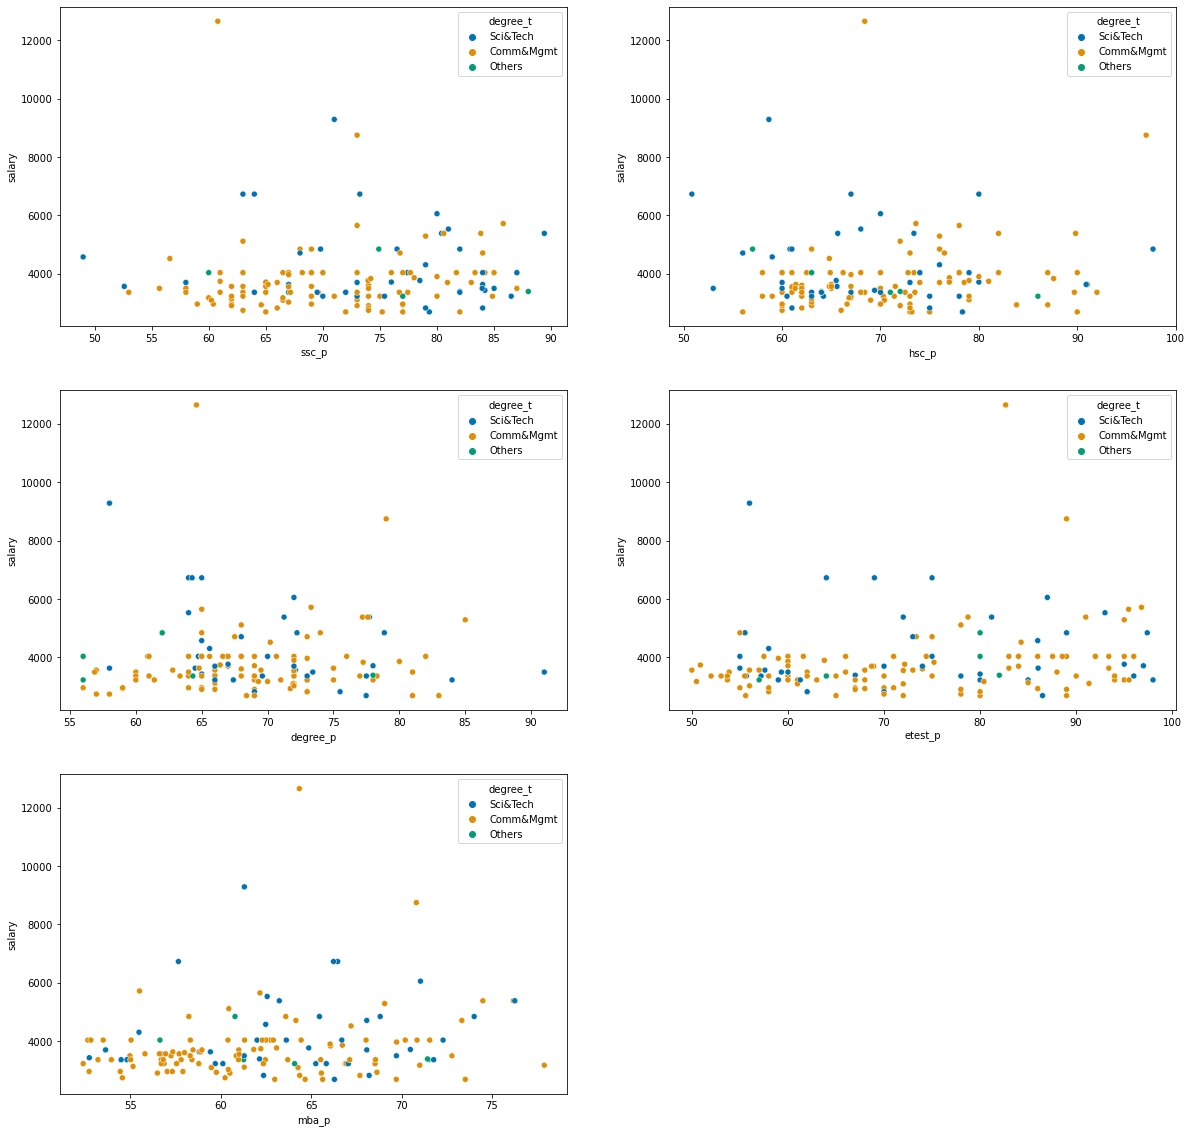

In [13]:

fig = plt.figure(figsize =(20,20))
fig.subplots_adjust(hspace=0.2, wspace=0.2)

for i in numcols:
    ax = fig.add_subplot(3, 2, numcols.index(i)+1)
    sns.scatterplot(x = i, y= 'salary', data=df, hue='degree_t', ax=ax, palette='colorblind')
    

# Conclusions/Message

The conclusions, grades do matter in regards to placement, somewhat, but it is very possible to be placed without the best past grades. 

Percentile finishes in your "course" do not seem to dictate salaries, although there is a slight trend toward higher salaries. 

Conclusions, if you can get in, apply and work your tail off to get placed and get a good job. 
